In [5]:

import pandas as pd
import os

files=[file for file in os.listdir(r'C:\Users\DELL\Desktop\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(r'C:\Users\DELL\Desktop\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data'+'\\'+file)
    all_months_data=pd.concat([all_months_data,df])



all_months_data.to_csv(r'C:\Users\DELL\Desktop\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\all_data.csv',index=False)

What was the best month for sales? How much was earned that month

In [9]:
all_data=pd.read_csv(r'C:\Users\DELL\Desktop\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\all_data.csv')

In [17]:
nan_values=all_data[all_data.isna().any(axis=1)]
all_data=all_data.dropna(how='all')

In [56]:
# Parse 'Order Date' to datetime first so we can safely use datetime accessors like .dt
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format="%m/%d/%y %H:%M", errors='coerce')

# Drop rows with invalid dates (these typically come from header rows accidentally included)
all_data = all_data.dropna(subset=["Order Date"])

# Extract Month as integer from the datetime column
all_data["Month"] = all_data["Order Date"].dt.month.astype("int32")

# Convert numeric columns to numeric dtype (coerce invalid to NaN)
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors='coerce')
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors='coerce')

# Drop rows that couldn't be converted to numeric values to avoid string concatenation issues
all_data = all_data.dropna(subset=["Quantity Ordered", "Price Each"])

# Create City, Hour, Minute columns
all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1].strip() + " (" + x.split(",")[2].split(" ")[1] + ")")
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

# Compute Sales as numeric (float) and round to 2 decimals
all_data["Sales"] = (all_data["Quantity Ordered"] * all_data["Price Each"]).round(2)

all_data.to_csv(r'C:\Users\DELL\Desktop\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\all_data.csv',index=False)

# Optionally cast to int if you only need whole dollars (not recommended due to cents loss)
# all_data["Sales"] = all_data["Sales"].astype("int32")

# Sum sales per month
monthly_sales = all_data.groupby("Month")["Sales"].sum()
monthly_sales

# Show the cleaned dataframe


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
     ------------- ----------------------- 41.0/114.6 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 114.6/114.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.1 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/8.1 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.4/8.1 MB 3.6 MB/s eta 0:00:02
   ------- -----


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


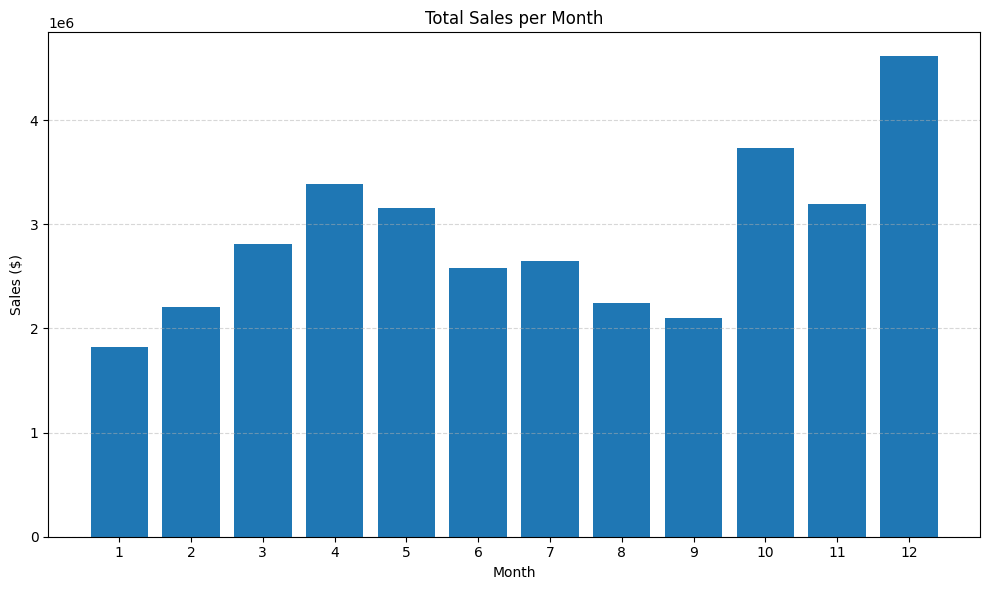

In [41]:
%pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

months = list(range(1, 13))
# Ensure the Series is ordered by month before plotting
sales_values = monthly_sales.reindex(months).values

plt.figure(figsize=(10, 6))
plt.bar(months, sales_values)
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Total Sales per Month")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Which product has the highest sales?


In [ ]:
Product_Sales=all_data.groupby("Product")["Sales"].sum().sort_values(ascending=False)

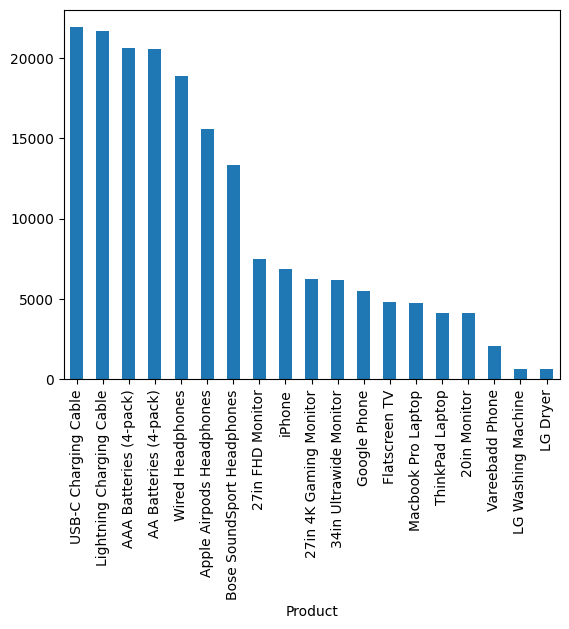

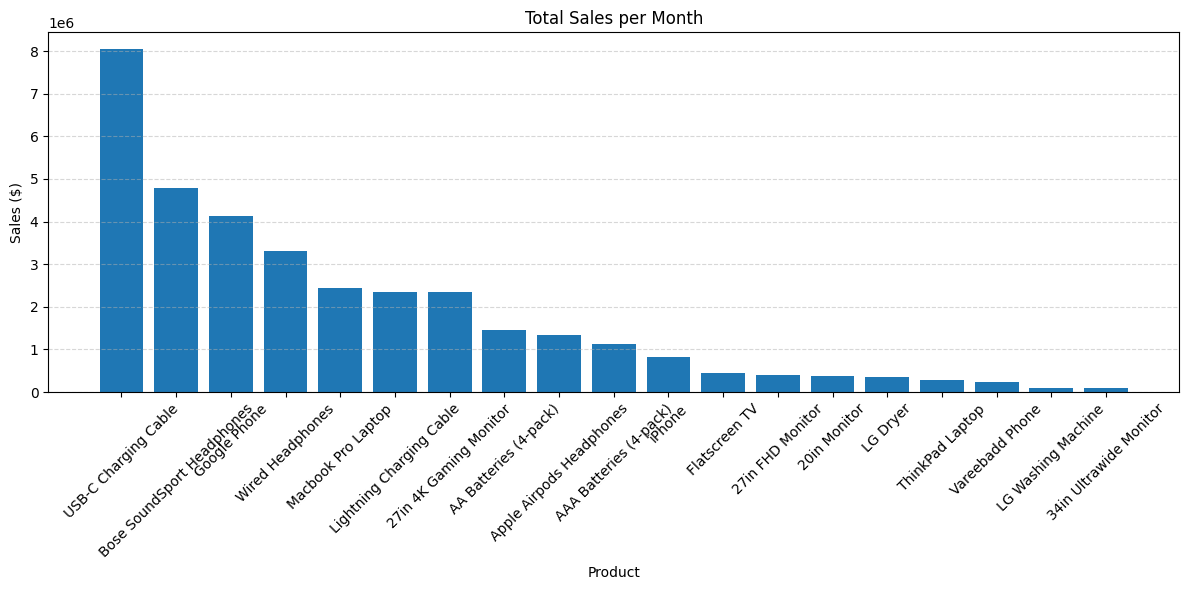

In [47]:
import matplotlib.pyplot as plt

all_data["Product"].value_counts().plot(kind='bar')
plt.figure(figsize=(12, 6))
products = all_data["Product"].unique()
sales_values = Product_Sales.values
plt.bar(products, sales_values)
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel("Sales ($)")
plt.title("Total Sales per Month")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

What is City has highest sales?

In [49]:
City_Sales=all_data.groupby("City")["Sales"].sum().sort_values(ascending=False)


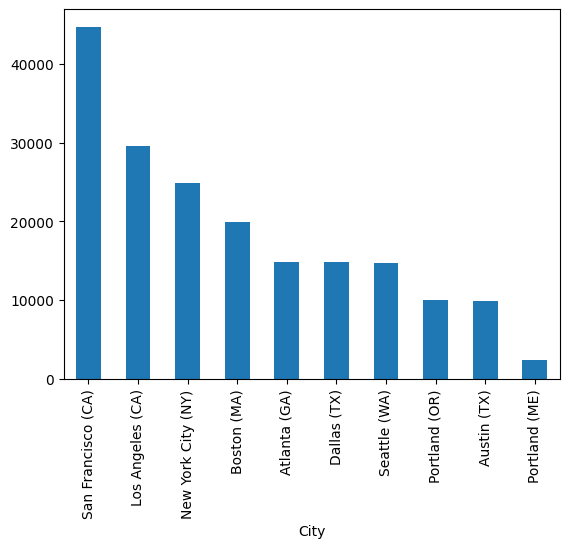

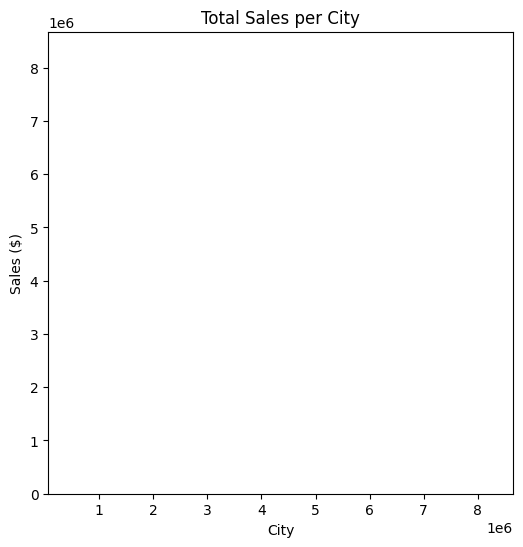

In [55]:
import matplotlib.pyplot as plt

all_data["City"].value_counts().plot(kind='bar')
plt.figure(figsize=(6, 6))
products = all_data["City"].unique()
sales_values = City_Sales.values
plt.bar(City_Sales, sales_values)

plt.xlabel('City')
plt.ylabel("Sales ($)")
plt.title("Total Sales per City")


plt.show()
